In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#defining factors
RATIO_MEN=[0.5,0.65,0.8,0.95] 
PROB_MEN=[0.05,0.20,0.35,0.5,0.65,0.8,0.95]
DIFF_PROB=[-0.45,-0.30,-0.15,0,0.15,0.30,0.45]
STD_ABILITY1=4
STD_ABILITY2=3
MEANS={'0.05':[20.88,10.88], '0.20':[22.9,12.9], '0.35':[24.035,14.035], '0.50':[25,15], '0.65':[25.965,15.965], '0.80':[27.1,17.1], '0.95':[29.12,19.12]}
STD_NOISE=2.5
NUMBER_DATASETS=550
n=1000

In [3]:
def createSample(sex, prob_men, diff_prob):
    if sex=='M':
        height=random.gauss(178.4,7.6)
        ability1=random.gauss(MEANS[format(prob_men,'.2f')][0],STD_ABILITY1)
        ability2=random.gauss(MEANS[format(prob_men,'.2f')][1],STD_ABILITY2)
        ability1_noise=ability1+random.gauss(0,STD_NOISE)
        ability2_noise=ability2+random.gauss(0,STD_NOISE)
    else:
        height=random.gauss(164.7,7.1)
        ability1=random.gauss(MEANS[format(prob_men+diff_prob, '.2f')][0],STD_ABILITY1)
        ability2=random.gauss(MEANS[format(prob_men+diff_prob, '.2f')][1],STD_ABILITY2)
        ability1_noise=ability1+random.gauss(0,STD_NOISE)
        ability2_noise=ability2+random.gauss(0,STD_NOISE)
    
    
    abilitySum_noise = ability1_noise + ability2_noise
    if ability1 + ability2 >=40:
        label=1
    else:
        label=0
    
       
    sample=[sex, height, ability1_noise, ability2_noise, abilitySum_noise , label]
    return sample

In [4]:
def createDataFrame(prob_men, diff_prob, ratio_men):
    sampleList = []
    data = []

    for i in range(0,int(n*ratio_men)):
        sampleList.append(createSample('M', prob_men, diff_prob))
    for i in range(0,int(n*(1-ratio_men))):
        sampleList.append(createSample('F', prob_men, diff_prob))
    
    dataSet = pd.DataFrame(sampleList, columns=['Sex', 'Height', 'Ability 1', 'Ability 2', 'Ability Sum', 'Label'])
    dataSet['Sex']= dataSet['Sex'].map({'M':0,'F':1})
    dataSet_M = dataSet.query('Sex == 0').drop(['Sex'], axis=1)
    dataSet_W = dataSet.query('Sex == 1').drop(['Sex'], axis=1)
    
    data = [dataSet, dataSet_M, dataSet_W]
    
    return data

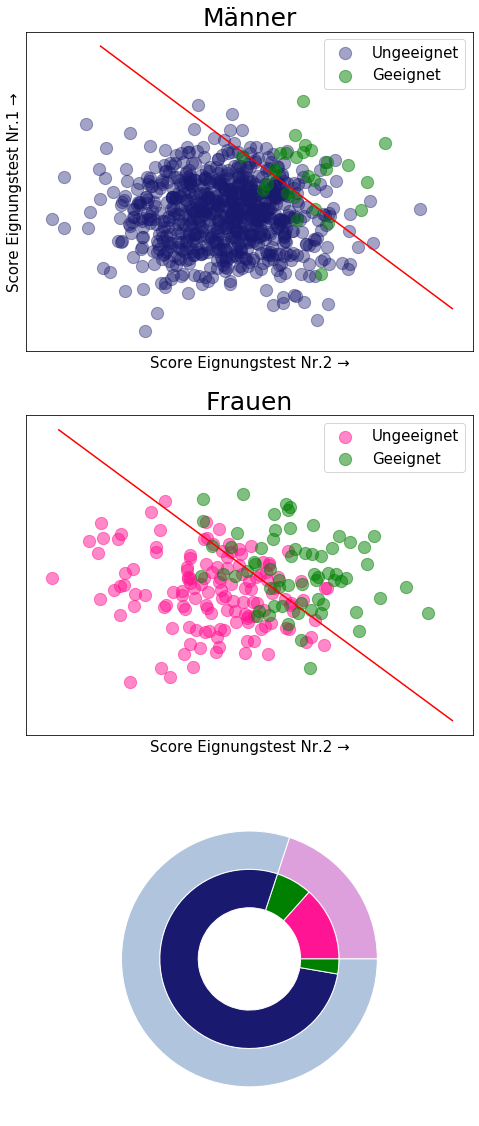

In [74]:
data_H1 = createDataFrame(PROB_MEN[0], DIFF_PROB[5], RATIO_MEN[2])

x_men0=data_H1[1].query('Label == 0')['Ability 1']
x_men1=data_H1[1].query('Label == 1')['Ability 1']
y_men0=data_H1[1].query('Label == 0')['Ability 2']
y_men1=data_H1[1].query('Label == 1')['Ability 2']

x_women0=data_H1[2].query('Label == 0')['Ability 1']
x_women1=data_H1[2].query('Label == 1')['Ability 1']
y_women0=data_H1[2].query('Label == 0')['Ability 2']
y_women1=data_H1[2].query('Label == 1')['Ability 2']

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (8,20))


ax1.plot([10,20,30,40],[30,20,10,0], c='r')
ax1.scatter(x_men0, y_men0, c='midnightblue', alpha=0.4, s= 150.0, label = 'Ungeeignet')
ax1.scatter(x_men1, y_men1, c='green', alpha=0.5, s=150.0, label = 'Geeignet')
ax1.legend(fontsize = 15)
ax1.set_title('Männer', fontsize = 25)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlabel('Score Eignungstest Nr.2 →',fontsize = 15 )
ax1.set_ylabel('Score Eignungstest Nr.1 →',fontsize = 15)


ax2.plot([10,20,30,40],[30,20,10,0], c='r')
ax2.scatter(x_women0, y_women0, c='deeppink', alpha=0.5, s= 150.0, label = 'Ungeeignet')
ax2.scatter(x_women1, y_women1, c='green', alpha=0.5, s= 150.0, label = 'Geeignet')
ax2.legend(fontsize = 15)
ax2.set_title('Frauen', fontsize = 25)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlabel('Score Eignungstest Nr.2 →', fontsize = 15)



size = 0.3
vals = np.array([[(len(x_women0)+len(y_women0)),(len(x_women1) + len(y_women1)) ], [(len(x_men0)+len(y_men0)),(len(x_men1) + len(y_men1))]])
ax3.pie(vals.sum(axis=1), radius=1, colors=['plum', 'lightsteelblue'],
       wedgeprops=dict(width=size, edgecolor='w'))

ax3.pie(vals.flatten(), radius=1-size, colors=['deeppink', 'green','midnightblue', 'green'],
       wedgeprops=dict(width=size, edgecolor='w'))


plt.show()

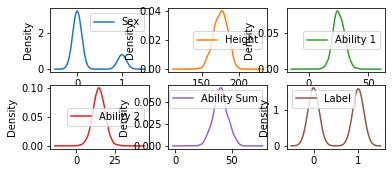

In [8]:
data_H1[0].plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

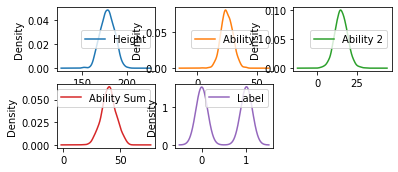

In [9]:
data_H1[1].plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

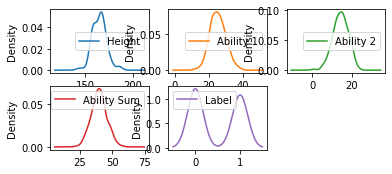

In [10]:
data_H1[2].plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

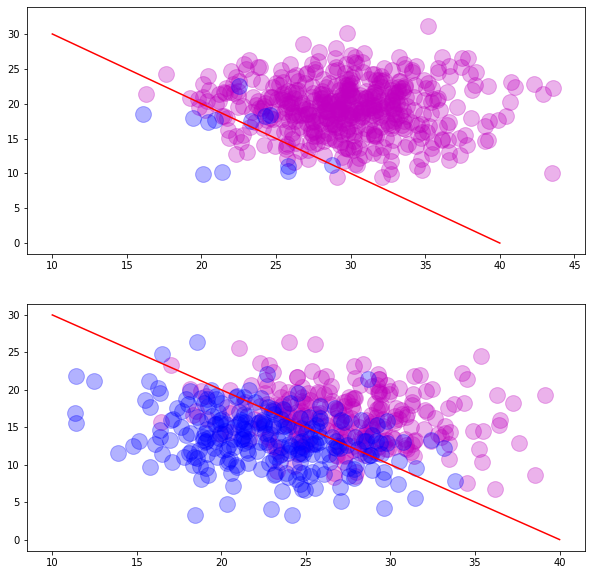

In [12]:
data = createDataFrame(0.95, -0.45, 0.5)

x_men0=data[1].query('Label == 0')['Ability 1']
x_men1=data[1].query('Label == 1')['Ability 1']
y_men0=data[1].query('Label == 0')['Ability 2']
y_men1=data[1].query('Label == 1')['Ability 2']

x_women0=data[2].query('Label == 0')['Ability 1']
x_women1=data[2].query('Label == 1')['Ability 1']
y_women0=data[2].query('Label == 0')['Ability 2']
y_women1=data[2].query('Label == 1')['Ability 2']

plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.plot([10,20,30,40],[30,20,10,0], c='r')
plt.scatter(x_men1, y_men1, c='m', alpha=0.3, s=250.0)
plt.scatter(x_men0, y_men0, c='b', alpha=0.3, s= 250.0)


plt.subplot(2,1,2)
plt.plot([10,20,30,40],[30,20,10,0], c='r')
plt.scatter(x_women1, y_women1, c='m', alpha=0.3, s= 250.0)
plt.scatter(x_women0, y_women0, c='b', alpha=0.3, s= 250.0)


plt.show()